# Projeto Análise e classificação Churn
---

## Importando Dados
---

In [76]:
!pip install seaborn pandas -qq 

In [77]:
import pandas as pd

pd.set_option('display.max_columns', 100)

In [78]:
dados = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/ML_Classificacao_por_tras_dos_panos/main/Dados/Customer-Churn.csv")
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [79]:
dados.shape

(7043, 18)

## Identificando e analisando as variáveis do Dataset
---

In [80]:
dados.describe()

,Maior65Anos,MesesDeContrato,ContaMensal
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [81]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Maior65Anos              7043 non-null   int64  
 1   Conjuge                  7043 non-null   object 
 2   Dependentes              7043 non-null   object 
 3   MesesDeContrato          7043 non-null   int64  
 4   TelefoneFixo             7043 non-null   object 
 5   VariasLinhasTelefonicas  7043 non-null   object 
 6   ServicoDeInternet        7043 non-null   object 
 7   SegurancaOnline          7043 non-null   object 
 8   BackupOnline             7043 non-null   object 
 9   SeguroNoDispositivo      7043 non-null   object 
 10  SuporteTecnico           7043 non-null   object 
 11  TVaCabo                  7043 non-null   object 
 12  StreamingDeFilmes        7043 non-null   object 
 13  TipoDeContrato           7043 non-null   object 
 14  PagamentoOnline         

## Tratativa dos dados e pré-processamento dos dados
---

### Fazendo a tratativa com o replace nas colunas
---

In [82]:
dic_valores = {
    'Sim': 1,
    'Nao': 0,
}

dados_modificados = dados[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(dic_valores)
dados_modificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


### Fazendo a tratativa das colunas com mais de duas categorias presentes
---

Será retirado as colunas já tratadas pelo replace manual e feito a divisão e classificação das categorias

In [83]:
dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'], axis=1))

In [84]:
dados_final = pd.concat([dados_modificados, dummie_dados], axis=1)
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False
1,0,0,1,0,0,0,34,56.95,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False
2,0,0,1,1,1,0,2,53.85,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False
3,0,0,0,0,0,0,45,42.30,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,False,True
4,0,0,1,1,1,0,2,70.70,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False


## Redimensionando a variável `churn`, deixando os dados menos desbalanceados
---

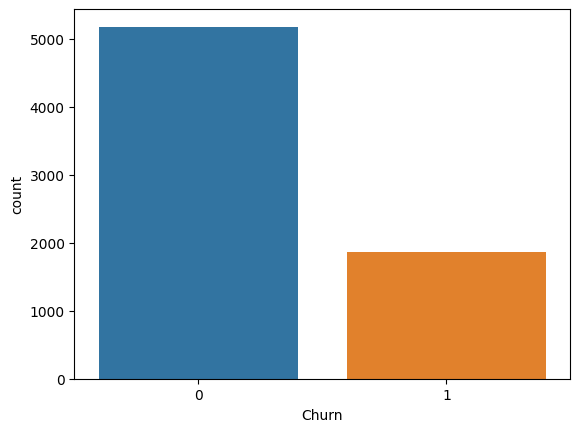

In [85]:
import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='Churn', data=dados_final)

In [86]:
# Para podermos aplicar o SMOTE, devemos separar  os dados em variáveis características e resposta  

X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

### Utilizando a técnica `oversampling` para balancear os dados
---

Será utilizado a classe Smote da biblioteca imbalanced-learn para balancear a variável

In [87]:
!python -m pip install imbalanced-learn -qq

In [88]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

In [89]:
dados_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,0
1,0,0,1,0,0,34,56.95,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,0


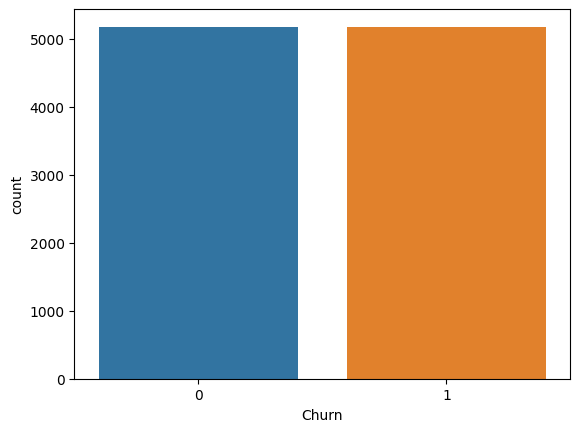

In [90]:
ax = sns.countplot(x='Churn', data=dados_final)  # plotando a variável target balanceada.

## Preparando os dados para treinamento
---

In [91]:
# Registro teste para classificar
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]
# Ymaria = ?

### Fazendo os pre-processamentos dos dados, deixando todos na mesma escala e divisão de testes e treino
---

In [92]:
x = dados_final.drop('Churn', axis=1)
y = dados_final['Churn']

### Fazendo a padronização dos dados
---

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
norm = StandardScaler()

x_normalizado = norm.fit_transform(x)
x_normalizado

array([[ 1.26542767, -0.52756038, -3.06083934, ...,  1.05443669,
        -0.54712618, -0.5315994 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.94837368,
         1.82773194, -0.5315994 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.94837368,
         1.82773194, -0.5315994 ],
       ...,
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.05443669,
        -0.54712618, -0.5315994 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.94837368,
        -0.54712618, -0.5315994 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.94837368,
        -0.54712618, -0.5315994 ]])

In [95]:
# verificando um registro
x_normalizado[0]

array([ 1.26542767, -0.52756038, -3.06083934,  0.81514931, -0.41254225,
       -1.10768665, -1.32177005, -0.99594945,  3.06083934, -0.93540224,
        1.48315631, -1.05853285, -0.44850949,  0.77835396, -0.44850949,
       -0.59625062, -1.09729069, -0.44850949,  1.35149921,  0.91918014,
       -0.44850949, -0.73976267,  0.7857356 , -0.44850949, -0.60667885,
        1.08898545, -0.44850949, -0.84638695,  1.10631892, -0.44850949,
       -0.85770576, -0.4605816 ,  0.68807296, -0.47271247, -0.50820122,
        1.05443669, -0.54712618, -0.5315994 ])

In [96]:
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns=X.columns))
Xmaria_normalizado

array([[-0.79024667, -0.52756038,  0.32670777,  0.81514931, -0.41254225,
        -1.14935017, -0.9723572 ,  1.00406703, -0.32670777, -0.93540224,
        -0.67423777,  0.94470379, -0.44850949,  0.77835396, -0.44850949,
        -0.59625062, -1.09729069, -0.44850949,  1.35149921,  0.91918014,
         2.22960721, -0.73976267, -1.27269275,  2.22960721, -0.60667885,
         1.08898545, -0.44850949, -0.84638695, -0.90389849, -0.44850949,
         1.16590099, -0.4605816 , -1.45333425,  2.11545084, -0.50820122,
        -0.94837368, -0.54712618,  1.88111576]])

## Distância Euclidiana:

$$\sqrt{\sum_{i=1}^k(a_{i}-b_{i})^2}$$

### Calculando Distância euclidiana passo a passo para entendimento da fórmula
---

In [97]:
import numpy as np

In [98]:
a = Xmaria_normalizado
b = x_normalizado[0]

In [99]:
a - b

array([[-2.05567434,  0.        ,  3.38754711,  0.        ,  0.        ,
        -0.04166352,  0.34941285,  2.00001647, -3.38754711,  0.        ,
        -2.15739408,  2.00323664,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         2.6781167 ,  0.        , -2.05842835,  2.6781167 ,  0.        ,
         0.        ,  0.        ,  0.        , -2.01021741,  0.        ,
         2.02360676,  0.        , -2.14140721,  2.58816332,  0.        ,
        -2.00281037,  0.        ,  2.41271515]])

In [100]:
np.square(a - b)

array([[4.22579699e+00, 0.00000000e+00, 1.14754754e+01, 0.00000000e+00,
        0.00000000e+00, 1.73584854e-03, 1.22089340e-01, 4.00006590e+00,
        1.14754754e+01, 0.00000000e+00, 4.65434920e+00, 4.01295706e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.17230906e+00, 0.00000000e+00, 4.23712727e+00, 7.17230906e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.04097403e+00, 0.00000000e+00, 4.09498430e+00, 0.00000000e+00,
        4.58562485e+00, 6.69858936e+00, 0.00000000e+00, 4.01124936e+00,
        0.00000000e+00, 5.82119441e+00]])

In [101]:
np.sum(np.square(a - b))

87.80230690890752

In [102]:
np.sqrt(87.80230690890752)

9.370288517911684

## Implementação do modelo KNN
---

### Divisão de testes e treino
---

In [103]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_normalizado, y, test_size=0.3, random_state=123)

### Instânciando modelo e treinamento
---

In [104]:
from sklearn.neighbors import KNeighborsClassifier

# por padrão ele utiliza k = 5 (5 vizinhos)
knn = KNeighborsClassifier(metric='euclidean')
knn.fit(x_treino, y_treino)

KNeighborsClassifier(metric='euclidean')

### Testando o modelo
---

In [105]:
predict_knn = knn.predict(x_teste)
predict_knn

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

## Implementação do modelo BernoulliNB (naive bayes)
---

In [106]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_normalizado, y, test_size=0.3, random_state=123)

### Instânciando modelo e treinamento
---

In [107]:
from sklearn.naive_bayes import BernoulliNB

# utilizado o valor da mediana do x_treino (np.median(x_treino)) para traçar o limine para o parametro 'binarize'
bnb = BernoulliNB(binarize=0.44)
bnb.fit(x_treino, y_treino)

BernoulliNB(binarize=0.44)

### Testando o modelo
---

In [108]:
predict_bnb = bnb.predict(x_teste)
predict_bnb

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

## Implementação do modelo Arvore de decisão (DecisionTreeClassifier)
---

In [113]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_normalizado, y, test_size=0.3, random_state=123)

### Instânciando modelo e treinamento
---

In [114]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)
dtc.fit(x_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [115]:
# Verificar a importância de cada atributo
dtc.feature_importances_

array([0.0181512 , 0.01497494, 0.00404973, 0.0206206 , 0.01551072,
       0.15455341, 0.20605364, 0.00861121, 0.00204014, 0.01497362,
       0.0059285 , 0.00160606, 0.        , 0.05357769, 0.        ,
       0.0165773 , 0.0107621 , 0.        , 0.00843441, 0.00804094,
       0.00043574, 0.01166525, 0.01582089, 0.        , 0.01396281,
       0.00692233, 0.        , 0.00414853, 0.00827523, 0.        ,
       0.01809795, 0.00893017, 0.23348935, 0.0280407 , 0.01590202,
       0.03529589, 0.01355288, 0.02099406])

### Testando o modelo
---

In [116]:
predict_dtc = dtc.predict(x_teste)
predict_dtc

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

## Validação dos modelos
---

### Matriz de cofusão
---

In [121]:
from sklearn.metrics import confusion_matrix

#### 1- Modelo KNN
---

In [122]:
print(confusion_matrix(y_teste, predict_knn))

[[1245  324]
 [ 262 1274]]


#### 1- Modelo Bernoulli
---

In [123]:
print(confusion_matrix(y_teste, predict_bnb))

[[1060  509]
 [ 209 1327]]


#### 1- Modelo DecisionTreeClassifier
---

In [124]:
print(confusion_matrix(y_teste, predict_dtc))

[[1278  291]
 [ 274 1262]]
